In [5]:
import numpy as np
import matplotlib.pyplot as plt
import lattpy as lp
from lattpy import plotting

In [6]:
WIDTH = 5.6
plt.style.use(['./thesis.mplstyle', "petroff10"])

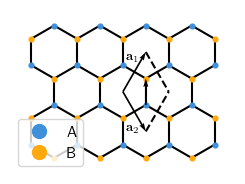

In [7]:
a_0 = 1
a = np.sqrt(3) * a_0

graphene_A = lp.Atom("A", radius=0.09)
graphene_B = lp.Atom("B", radius=0.09)

basis = 0.5 * a * np.array([[1, np.sqrt(3)],
                  [1, -np.sqrt(3)]])

latt = lp.Lattice(basis)


latt.add_atom([0.5 * a, -0.5 * a / np.sqrt(3)], graphene_A)
latt.add_atom([0.5 * a, 0.5 * a / np.sqrt(3)], graphene_B)
latt.add_connection(graphene_A, graphene_B, analyze=True)

structure = latt.build((7, 6))

#ax = latt.plot(show_indices=True)

fig, ax = plt.subplots(figsize=(WIDTH / 2, WIDTH / 2.5))

ax = latt.plot(ax=ax)

ax.legend(loc='lower left')

lp.plotting.hide_box(ax, axis=True)

lp.plotting.draw_arrows(ax, basis[0], pos=latt.center())
lp.plotting.draw_arrows(ax, basis[1], pos=latt.center())

lp.plotting.draw_vectors(ax, [basis[0][0], -basis[0][1]], pos=latt.center() + basis[0], linestyle='dashed', color='k')
lp.plotting.draw_vectors(ax, [basis[1][0], -basis[1][1]], pos=latt.center() + basis[1], linestyle='dashed', color='k')

arrow_1 = lp.plotting.draw_arrows(ax, [0, a / np.sqrt(3)], pos=latt.position(21), linewidth=2000)

ax.text(3.6, 4.2, '$\mathbf{a}_1$', size="small", rotation=0)
ax.text(3.6, 1.5, '$\mathbf{a}_2$', size="small", rotation=0)

fig.savefig('graphene lattice.pgf')
#plt.close(fig)

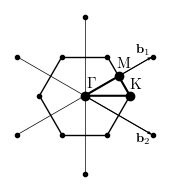

In [8]:
reciprocal_lattice = latt.reciprocal_lattice()

basis = reciprocal_lattice.vectors

bz = reciprocal_lattice.wigner_seitz_cell()

fig, ax = plt.subplots(figsize=(WIDTH / 2, WIDTH / 2.5))

ax = bz.draw(color='black', ax=ax)

lp.plotting.draw_arrows(ax, basis[0])
lp.plotting.draw_arrows(ax, basis[1])
#ax.annotate('$\mathbf{b}_1$', basis[0])

Gamma = bz.symmetry_points()[0]
M = bz.symmetry_points()[2][5]
K = bz.symmetry_points()[1][4]

lp.plotting.draw_points(ax, Gamma, color='black', size=6)
lp.plotting.draw_points(ax, M, color='black', size=6)
lp.plotting.draw_points(ax, K, color='black', size=6)

lp.plotting.draw_line(ax, np.array([Gamma, M, K, Gamma]), color='black')

ax.annotate('$\Gamma$', (Gamma[0], Gamma[1]), xytext=(2, 6), textcoords='offset points', fontsize='medium')
ax.annotate('$\mathrm{M}$', (M[0], M[1]), xytext=(-1, 6), textcoords='offset points', fontsize='medium')
ax.annotate('$\mathrm{K}$', (K[0], K[1]), xytext=(0, 5), textcoords='offset points', fontsize='medium')

ax.text(2.75, 2.3, '$\mathbf{b}_1$', size="small", rotation=0)
ax.text(2.75, -2.5, '$\mathbf{b}_2$', size="small", rotation=0)

lp.plotting.hide_box(ax, axis=True)

fig.savefig('graphene brillouin_zone.pgf')
#plt.close(fig)